# Exercise 7 - DT, gradient boosting and random forest for regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

We use the customer data again. This time we do not want to perform a classification according to high_revenue, but instead directly predict the numerical value turnover (total_sum).

In [2]:
# space
df = pd.read_csv('prepared_data.csv')
df.head()

,weekday,daytime,isHoliday,distance,count,startClusterName,startClusterZip,startClusterID,endClusterName,endClusterZip,endClusterID,year,month,total
0,Di,7,Keine Ferien,3,15,Hunedoara,71171,3254026000002,Hunedoara,71171,3254026000007,2021,3,45
1,Mi,17,Keine Ferien,0,10,Turda,80982,3241013050002,Turda,80982,3241013050008,2021,3,0
2,Sa,11,Keine Ferien,3,10,Turda,80982,3241013050007,Turda,80982,3241013030001,2021,3,30
3,Fr,13,Keine Ferien,0,15,Bran,91157,3254028001012,Bran,91157,3254028001004,2021,3,0
4,Fr,18,Keine Ferien,7,10,Bran,91157,3254028001003,Turda,80982,3241013070001,2021,3,70


## 7.1 Handling missing values
First of all, we start with the treatment of missing values.

In [3]:
# Vérifier les valeurs manquantes par colonne
valeurs_manquantes = df.isnull().sum()
print(valeurs_manquantes)

weekday             0
daytime             0
isHoliday           0
distance            0
count               0
startClusterName    0
startClusterZip     0
startClusterID      0
endClusterName      0
endClusterZip       0
endClusterID        0
year                0
month               0
total               0
dtype: int64


In [4]:
from sklearn import preprocessing

dfCopy = df.drop(['startClusterZip','endClusterZip', 'startClusterName', 'endClusterName', 'total'], axis = 1)
dfCopy


,weekday,daytime,isHoliday,distance,count,startClusterName,endClusterName,year,month
0,Di,7,Keine Ferien,3,15,Hunedoara,Hunedoara,2021,3
1,Mi,17,Keine Ferien,0,10,Turda,Turda,2021,3
2,Sa,11,Keine Ferien,3,10,Turda,Turda,2021,3
3,Fr,13,Keine Ferien,0,15,Bran,Bran,2021,3
4,Fr,18,Keine Ferien,7,10,Bran,Turda,2021,3
...,...,...,...,...,...,...,...,...,...
237482,So,17,Keine Ferien,5,5,Turda,Turda,2020,10
237483,Mo,9,Ferien,0,15,Bran,Bran,2020,10
237484,Di,9,Keine Ferien,2,10,Bran,Bran,2020,10
237485,Mo,18,Keine Ferien,5,5,Hunedoara,Hunedoara,2020,10


## 7.2 Coding of relevant attributes
In the documentation of the algorithms to be used, it is clear that the data must be numerical. Try to understand this. Why is a label encoder sufficient here? Why does it not need to be normed?

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

In [5]:
labelenc = preprocessing.LabelEncoder()
labelenc.fit(dfCopy.isHoliday)
dfCopy['isHoliday'] = labelenc.transform(dfCopy.isHoliday)

labelenc.fit(dfCopy.startClusterName)
dfCopy['startClusterName'] = labelenc.transform(dfCopy.startClusterName)

labelenc.fit(dfCopy.endClusterName)
dfCopy['endClusterName'] = labelenc.transform(dfCopy.endClusterName)

labelenc.fit(dfCopy.weekday)
dfCopy['weekday'] = labelenc.transform(dfCopy.weekday)

labelenc.fit(dfCopy.endClusterName)
dfCopy['endClusterName'] = labelenc.transform(dfCopy.endClusterName)

dfPrepared = dfCopy

dfPrepared

,weekday,daytime,isHoliday,distance,count,startClusterName,endClusterName,year,month
0,0,7,1,3,15,1,1,2021,3
1,3,17,1,0,10,2,2,2021,3
2,5,11,1,3,10,2,2,2021,3
3,2,13,1,0,15,0,0,2021,3
4,2,18,1,7,10,0,2,2021,3
...,...,...,...,...,...,...,...,...,...
237482,6,17,1,5,5,2,2,2020,10
237483,4,9,0,0,15,0,0,2020,10
237484,0,9,1,2,10,0,0,2020,10
237485,4,18,1,5,5,1,1,2020,10


## 7.3 Training the algorithms with k-fold cross-validation
In the following, three tree-based methods from the lecture "Supervised Methods Part 2" will be applied. For this purpose, a 10-fold cross-validation is to be applied and then the model is to be evaluated using statistical key figures.
In each case, use the function cross_val_predict(model, x,y,cv=10) for the cross-validation.

In [6]:
from sklearn.model_selection import cross_val_predict, cross_validate
import sklearn.metrics as metrics

df_sampled = dfPrepared.sample(frac=0.1, random_state=42)
x = df_sampled.drop(['count'], axis = 1)
y = df_sampled['count'].astype(int)

#### A1: Decision Tree Regressor
Train with the use of cross_val_predict(XYregressor, x,y,cv=10) at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html?highlight=cross_val_predict#sklearn.model_selection.cross_val_predict


In [7]:
from sklearn.tree import DecisionTreeRegressor

treeRegressor = DecisionTreeRegressor(min_samples_split = 10, min_samples_leaf = 5)
y_pred = cross_val_predict(treeRegressor, x, y, cv = 10)

Metrics for the evaluation:

In [8]:
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)  
r2 = metrics.r2_score(y,y_pred)

print("Results from sklearn.metrics:\n")
print("R-Squared:", r2)
print()

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)

Results from sklearn.metrics:

R-Squared: -0.06507107902008902

MAE: 3.3190895920119194
MSE: 17.955802558426367
RMSE: 4.237428767357201


after training the algorithm, you can  have a look at the important features for this conrete trained algorithm.

In [9]:
from sklearn.tree import DecisionTreeRegressor
treeRegressor.fit(x, y)

feature_importances = treeRegressor.feature_importances_

importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

            Feature  Importance
1           daytime    0.262692
3          distance    0.208146
0           weekday    0.195334
7             month    0.128064
5    endClusterName    0.101408
4  startClusterName    0.063312
2         isHoliday    0.023635
6              year    0.017410


returns a list of importance for each feature, with higher values having a higher importance for the predictions.This allows you to see which features the decision tree considers important and you can use these findings for further analyses.

#### A1.1: Decision Tree Regressor - additional parameters
Pruning is a technique used in decision trees to simplify the tree and avoid overfitting. 
Rules for pre-pruning are, for example, a maximum tree depth.

In [10]:
from sklearn.tree import DecisionTreeRegressor

treeRegressor = DecisionTreeRegressor(min_samples_split = 10, min_samples_leaf = 5,  max_depth=10, max_leaf_nodes=50 )
y_pred = cross_val_predict(treeRegressor, x, y, cv = 10)

In [11]:
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)  
r2 = metrics.r2_score(y,y_pred)

print("Results from sklearn.metrics:\n")
print("R-Squared:", r2)
print()

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)

Results from sklearn.metrics:

R-Squared: 0.09551936311468756

MAE: 3.014999468421475
MSE: 15.248443088675847
RMSE: 3.904925490796956


In [12]:
from sklearn.tree import DecisionTreeRegressor
treeRegressor.fit(x, y)

feature_importances = treeRegressor.feature_importances_

importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

            Feature  Importance
3          distance    0.488379
1           daytime    0.166007
4  startClusterName    0.144717
5    endClusterName    0.099523
2         isHoliday    0.064863
7             month    0.014766
6              year    0.012625
0           weekday    0.009120


#### A2: Random Forest Regressor
Train the same way as above.

In [13]:
from sklearn.ensemble import RandomForestRegressor

forestRegressor = RandomForestRegressor(min_samples_split = 10, min_samples_leaf = 5, n_estimators = 100)

y_pred = cross_val_predict(forestRegressor, x, y, cv = 10)

In [14]:
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)  
r2 = metrics.r2_score(y,y_pred)

print("Ergebnisse von sklearn.metrics:\n")
print("R-Squared:", r2)
print()

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)

Ergebnisse von sklearn.metrics:

R-Squared: 0.0750289774339179

MAE: 3.074449621312731
MSE: 15.59388606133492
RMSE: 3.94890947748045


In [15]:
forestRegressor.fit(x, y)

feature_importances = forestRegressor.feature_importances_

importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

            Feature  Importance
1           daytime    0.274451
3          distance    0.200472
0           weekday    0.200308
7             month    0.144370
5    endClusterName    0.068071
4  startClusterName    0.064305
2         isHoliday    0.029029
6              year    0.018994


#### A2.1: Random Forest Regressor - additional parameters

In [16]:
from sklearn.ensemble import RandomForestRegressor

forestRegressor = RandomForestRegressor(min_samples_split = 10, min_samples_leaf = 5, n_estimators = 100, max_depth=10, max_leaf_nodes=50 )

y_pred = cross_val_predict(forestRegressor, x, y, cv = 10)

In [17]:
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)  
r2 = metrics.r2_score(y,y_pred)

print("Results from sklearn.metrics:\n")
print("R-Squared:", r2)
print()

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)

Results from sklearn.metrics:

R-Squared: 0.10520339269327494

MAE: 2.9825654260863743
MSE: 15.085182132192964
RMSE: 3.8839647439430967


#### A3: Gradient Boost Trees (Regression)
Train the same way as above.

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

gbRegressor = GradientBoostingRegressor(n_estimators = 100, max_depth = 4)

y_pred = cross_val_predict(gbRegressor, x, y, cv = 10)

In [19]:
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)  
r2 = metrics.r2_score(y,y_pred)

print("Ergebnisse von sklearn.metrics:\n")
print("R-Squared:", r2)
print()

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)

Ergebnisse von sklearn.metrics:

R-Squared: 0.11134838250653101

MAE: 2.976778347130475
MSE: 14.981585080330582
RMSE: 3.8706052602055125


#### A3.1: Gradient Boost Trees (Regression) - additional Parameters

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

gbRegressor = GradientBoostingRegressor(n_estimators = 100, max_depth = 4,  max_leaf_nodes=50,  min_samples_leaf = 5)

y_pred = cross_val_predict(gbRegressor, x, y, cv = 10)

In [25]:
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)  
r2 = metrics.r2_score(y,y_pred)

print("Results from sklearn.metrics:\n")
print("R-Squared:", r2)
print()

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)

Results from sklearn.metrics:

R-Squared: 0.11092047353800127

MAE: 2.9774646562023164
MSE: 14.98879910491847
RMSE: 3.8715370468224206


## 7.4 Interpretation of the quality criteria
Interpret the quality criteria and make a statement on the usability of the models.

## 7.5 Train several models simultaneously and compare them visually
Go through the code below and follow the individual steps. What does the visualization tell you?

In [26]:
import time

estimators = [('DT', DecisionTreeRegressor(min_samples_split = 10, min_samples_leaf = 5)),
    ('RF', RandomForestRegressor(min_samples_split = 10, min_samples_leaf = 5, n_estimators = 100)), 
              ('GB', GradientBoostingRegressor(n_estimators = 100, max_depth = 4))]

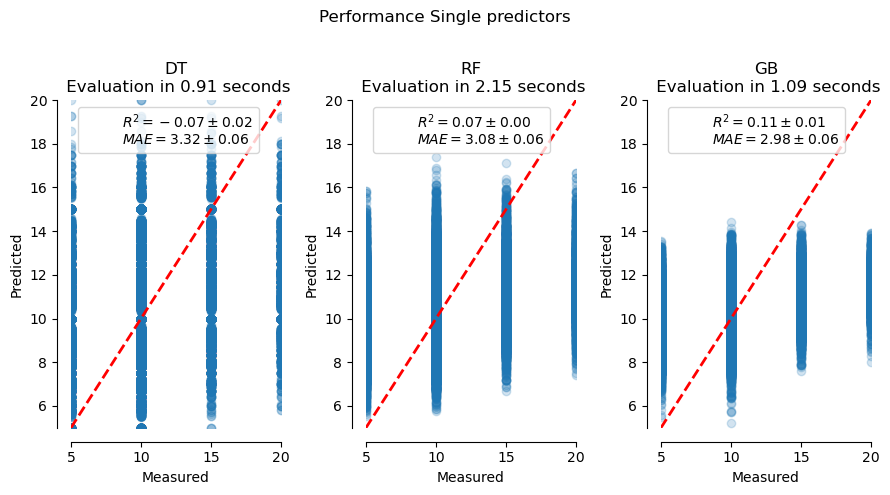

In [27]:
def plot_regression_results(ax, y, y_pred, title, scores, elapsed_time):
    """Scatter plot of the predicted vs true targets."""
    ax.plot([y.min(), y.max()],
            [y.min(), y.max()],
            '--r', linewidth=2)
    ax.scatter(y, y_pred, alpha=0.2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([y.min(), y.max()])
    ax.set_ylim([y.min(), y.max()])
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
    ax.legend([extra], [scores], loc='upper left')
    title = title + '\n Evaluation in {:.2f} seconds'.format(elapsed_time)
    ax.set_title(title)


fig, axs = plt.subplots(1, 3, figsize=(9, 5))
axs = np.ravel(axs)

for ax, (name, est) in zip(axs, estimators):
    start_time = time.time()
    score = cross_validate(est, x, y,
                           scoring=['r2', 'neg_mean_absolute_error'],
                           n_jobs=-1, verbose=0)
    elapsed_time = time.time() - start_time

    y_pred = cross_val_predict(est, x, y, n_jobs=-1, verbose=0)

    plot_regression_results(
        ax, y, y_pred,
        name,
        (r'$R^2={:.2f} \pm {:.2f}$' + '\n' + r'$MAE={:.2f} \pm {:.2f}$')
        .format(np.mean(score['test_r2']),
                np.std(score['test_r2']),
                -np.mean(score['test_neg_mean_absolute_error']),
                np.std(score['test_neg_mean_absolute_error'])),
        elapsed_time)

plt.suptitle('Performance Single predictors')
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.show()